In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [22]:
heart_study = pd.read_csv("Resources/Rates_and_Trends_in_Heart_Disease_and_Stroke_Mortality_Among_US_Adults__35___by_County__Age_Group__Race_Ethnicity__and_Sex___2000-2019.csv",dtype={"Year": "str"})

In [23]:
heart_study.shape

(5770240, 21)

In [24]:
heart_study.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001


In [25]:
heart_study.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [26]:
# Dropping columns our group determined is insignificant to our analysis
heart_study.drop(["GeographicLevel",
                  "DataSource",
                  "Class",
                  "Data_Value_Type",
                  "Data_Value_Footnote_Symbol",
                  "Data_Value_Footnote",
                  "StratificationCategory1",
                  "StratificationCategory2",
                  "StratificationCategory3",
                  "LocationID"], axis = 1, inplace = True)

# Renaming columns accordingly
heart_study.rename(columns={
    "LocationAbbr": "State",
    "LocationDesc": "County",
    "Stratification1": "Age Group",
    "Stratification2": "Ethnicity",
    "Stratification3": "Sex"
},
    inplace=True)

heart_study.head()

,Year,State,County,Topic,Data_Value,Data_Value_Unit,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
0,1999,AL,Autauga,All heart disease,NaN,"per 100,000",NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,AL,Autauga,All heart disease,NaN,"per 100,000",NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,AL,Autauga,All heart disease,NaN,"per 100,000",NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,AL,Autauga,All heart disease,NaN,"per 100,000",NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,AL,Autauga,All heart disease,NaN,"per 100,000",NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


In [27]:
heart_study.shape

(5770240, 11)

In [28]:
heart_study["Year"].unique()

array(['1999', '2013', '2014', '2005', '2012', '2010', '2009', '2011',
       '2007', '2019', '2018', '2004', '2016', '2015', '2000', '2002',
       '2003', '2006', '2008', '2001', '2017', '1999 - 2010',
       '2010 - 2019'], dtype=object)

In [29]:
# Dropping rows containing "1999-2010" and "2010-2019"
heart_study_cleaned = heart_study[(heart_study.Year != "1999 - 2010") & (heart_study.Year != "2010 - 2019")]
heart_study_cleaned["Year"].unique()

array(['1999', '2013', '2014', '2005', '2012', '2010', '2009', '2011',
       '2007', '2019', '2018', '2004', '2016', '2015', '2000', '2002',
       '2003', '2006', '2008', '2001', '2017'], dtype=object)

In [30]:
# Dropping rows that contain missing values
heart_study_cleaned = heart_study_cleaned.dropna(0)

heart_study_cleaned

C:\Users\Lauren Golden\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,Year,State,County,Topic,Data_Value,Data_Value_Unit,Confidence_limit_Low,Confidence_limit_High,Age Group,Ethnicity,Sex
53,2016,AL,Autauga,All stroke,25.7,"per 100,000",21.3,30.9,Ages 35-64 years,Overall,Overall
79,2011,AL,Autauga,All stroke,29.5,"per 100,000",22.9,39.7,Ages 35-64 years,Overall,Men
106,2017,AL,Autauga,All stroke,33.6,"per 100,000",25.4,44.1,Ages 35-64 years,Overall,Men
108,2017,AL,Autauga,All heart disease,128.7,"per 100,000",113.1,144.7,Ages 35-64 years,Overall,Overall
109,2016,AL,Autauga,All heart disease,128.1,"per 100,000",114.1,145.5,Ages 35-64 years,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...
5268494,2006,WY,Weston,Heart failure,589.3,"per 100,000",465.9,704.8,Ages 65 years and older,White,Overall
5268495,2013,WY,Weston,Heart failure,474.9,"per 100,000",403.2,551.1,Ages 65 years and older,White,Overall
5268496,2004,WY,Weston,Heart failure,600.2,"per 100,000",466.8,706.1,Ages 65 years and older,White,Overall
5268497,2005,WY,Weston,Heart failure,594.9,"per 100,000",458.2,719.7,Ages 65 years and older,White,Overall


In [83]:
heart_study_year = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] == "Overall") & 
                                                (heart_study_cleaned["Sex"] == "Overall")]
heart_study_year = heart_study_year.groupby(["Year"]).mean()
heart_study_year = heart_study_year.drop(["Confidence_limit_Low", "Confidence_limit_High"], axis=1)
heart_study_year = heart_study_year.reset_index()
heart_study_year

,Year,Data_Value
0,1999,700.612000
1,2000,684.192580
2,2001,663.015043
3,2002,652.106568
4,2003,631.975420
5,2004,590.138575
6,2005,578.539833
7,2006,545.439401
8,2007,523.330919
9,2008,515.268345


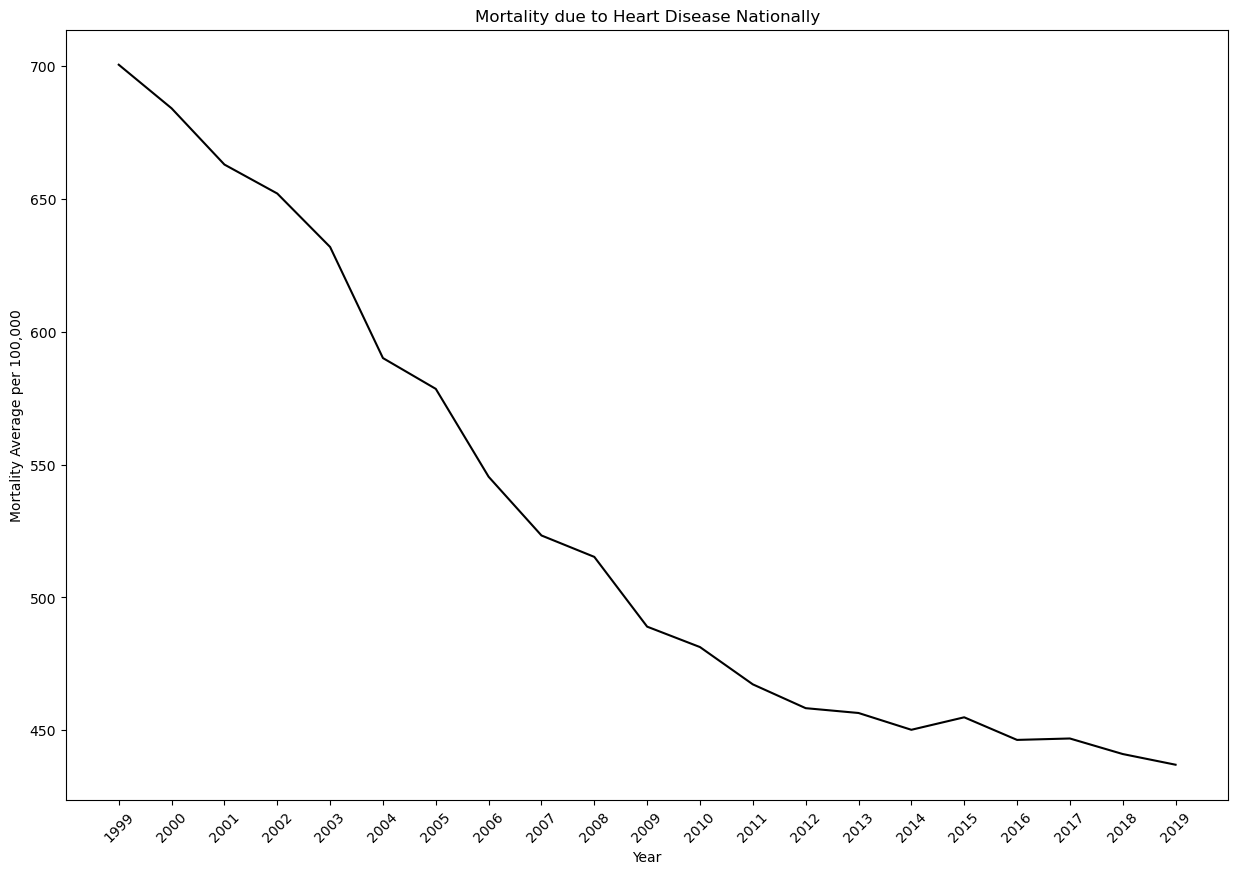

In [86]:
years = heart_study_year["Year"]

plt.figure(figsize=(15,10))
Overall, = plt.plot(years, heart_study_year["Data_Value"], color = "black", label = "Overall")
plt.title("Mortality due to Heart Disease Nationally")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()

In [32]:
heart_study_cleaned["Ethnicity"].unique()

array(['Overall', 'Black (Non-Hispanic)', 'Hispanic', 'White',
       'American Indian/Alaska Native', 'Asian/Pacific Islander'],
      dtype=object)

In [37]:
heart_study_ethnicity = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] != "Overall") & 
                                                (heart_study_cleaned["Sex"] != "Male") & 
                                                (heart_study_cleaned["Sex"] != "Female")]

heart_by_ethnicity = heart_study_ethnicity.groupby(["Year", "Ethnicity"]).mean()["Data_Value"]
heart_by_ethnicity = heart_by_ethnicity.unstack()
heart_by_ethnicity = heart_by_ethnicity.T
heart_by_ethnicity

# heart_study_ethnicity
# #ethnicity = heart_study_ethnicity.groupby(["Ethnicity", "Year"]).sum()
# #ethnicity.head(20)

# aian = heart_study_ethnicity.loc[heart_study_ethnicity["Ethnicity"] == "American Indian/Alaska Native"]
# aian = aian.groupby(["Year"]).sum()
# api = heart_study_ethnicity.loc[heart_study_ethnicity["Ethnicity"] == "Asian/Pacific Islander"]
# api = api.groupby(["Year"]).sum()
# blnh = heart_study_ethnicity.loc[heart_study_ethnicity["Ethnicity"] == "Black (Non-Hispanic)"]
# blnh = blnh.groupby(["Year"]).sum()
# his = heart_study_ethnicity.loc[heart_study_ethnicity["Ethnicity"] == "Hispanic"]
# his = his.groupby(["Year"]).sum()
# white = heart_study_ethnicity.loc[heart_study_ethnicity["Ethnicity"] == "White"]
# white = white.groupby(["Year"]).sum()

# ethnicity = pd.DataFrame({
#     "American Indian/Alaska Native": aian,
#     "Asian/Pacific Islander" : api,
#     "Black (Non-Hispanic)" : blnh,
#     "Hispanic" : his,
#     "White" : white
# })
# ethnicity

C:\Users\Lauren Golden\anaconda3\envs\pythondata\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Ethnicity,,,,,,,,,,,,,,,,,,,,,
American Indian/Alaska Native,309.647124,292.732000,283.469295,285.032152,304.609067,288.035200,276.352419,272.531352,260.070933,245.199238,...,242.620114,245.660952,232.566819,241.305676,242.132419,243.039886,234.399695,236.037981,226.250629,220.062667
Asian/Pacific Islander,260.403617,250.238577,246.055375,234.136996,229.028992,217.828992,211.837098,201.466811,193.126318,189.045035,...,183.093564,166.817710,165.067720,166.616407,158.263653,160.089220,157.034630,156.361303,159.466219,157.021935
Black (Non-Hispanic),664.355559,655.659509,639.191627,629.796558,616.308460,575.330439,557.920869,527.959294,510.274139,487.500370,...,456.197014,434.531299,425.952771,425.300921,419.547762,421.251299,420.164337,418.242186,416.185620,411.326325
Hispanic,308.168737,289.338037,280.159487,276.050911,262.977685,241.658379,243.783680,224.168607,216.656420,206.344947,...,193.237114,183.033957,180.341528,179.032408,177.090427,181.082665,177.554429,175.063067,173.924304,173.623047
White,699.469520,684.061490,662.246393,651.801597,630.943607,589.939607,578.380943,544.842799,522.245088,516.265921,...,482.319793,469.628344,460.871566,458.661463,453.231100,459.045988,450.330107,451.615558,445.766864,442.112896


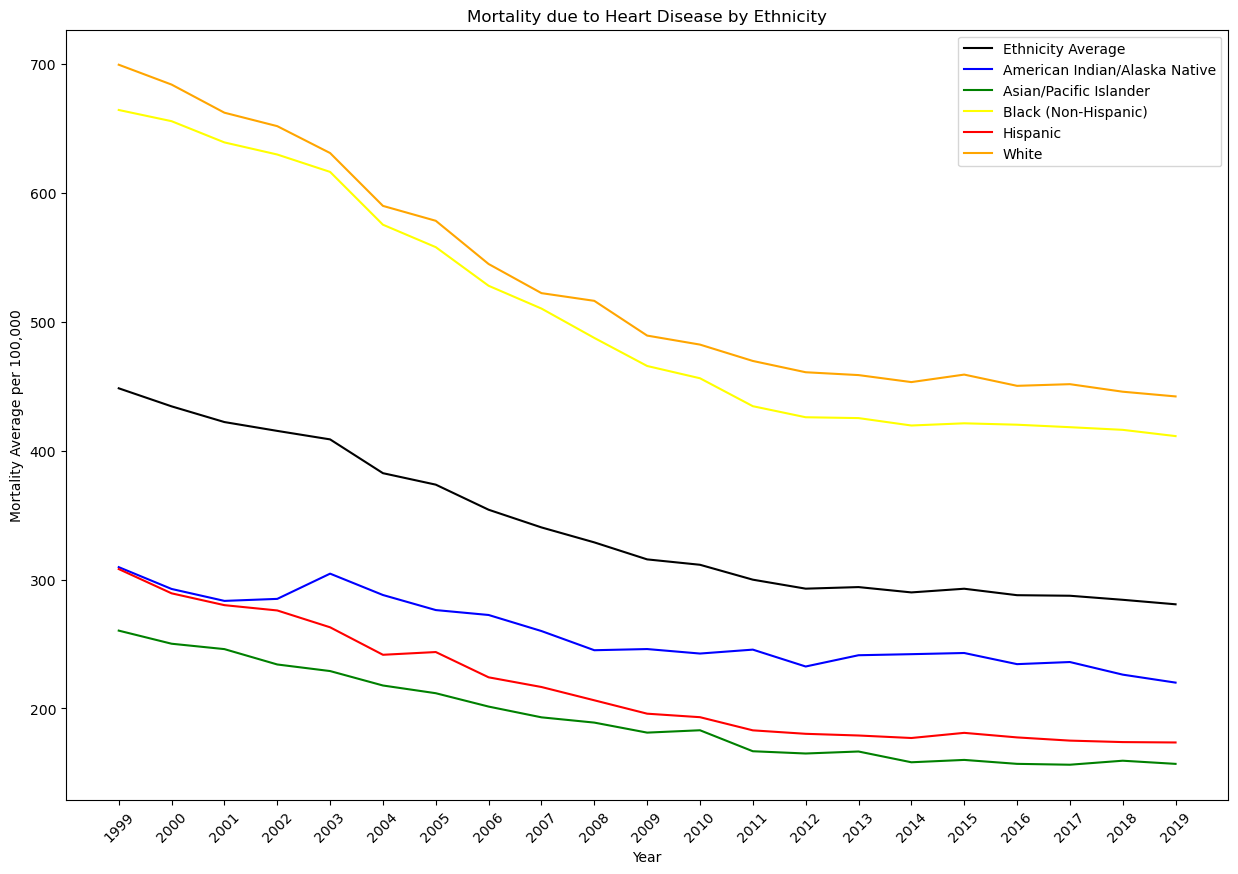

In [67]:
years = heart_by_ethnicity.keys()
ethnicity_trend = heart_by_ethnicity.mean()

plt.figure(figsize=(15,10))
ethnicity, = plt.plot(years, ethnicity_trend, color = "black", label = "Ethnicity Average")

American_Indian, = plt.plot(years, heart_by_ethnicity.loc["American Indian/Alaska Native", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="blue", label="American Indian/Alaska Native")

Asian, = plt.plot(years, heart_by_ethnicity.loc["Asian/Pacific Islander", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="green", label="Asian/Pacific Islander")

Black, = plt.plot(years, heart_by_ethnicity.loc["Black (Non-Hispanic)", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="yellow", label="Black (Non-Hispanic)")

Hispanic, = plt.plot(years, heart_by_ethnicity.loc["Hispanic", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="red", label="Hispanic")

White, = plt.plot(years, heart_by_ethnicity.loc["White", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="orange", label="White")

plt.legend(handles=[ethnicity, American_Indian, Asian, Black, Hispanic, White], loc="best")
plt.title("Mortality due to Heart Disease by Ethnicity")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()

In [54]:
heart_study_sex = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] == "Overall")]

heart_by_sex = heart_study_sex.groupby(["Year", "Sex"]).mean()["Data_Value"]
heart_by_sex = heart_by_sex.unstack()
heart_by_sex = heart_by_sex.T
heart_by_sex

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Sex,,,,,,,,,,,,,,,,,,,,,
Men,829.355662,804.955001,775.794398,766.133699,738.548127,688.869743,676.105542,638.550811,609.096408,599.923685,...,566.806857,550.170653,539.658557,541.526926,535.005228,536.830749,530.413708,533.684784,527.753170,523.255516
Overall,700.612000,684.192580,663.015043,652.106568,631.975420,590.138575,578.539833,545.439401,523.330919,515.268345,...,481.302201,467.262993,458.296551,456.481379,450.153041,454.856296,446.344130,446.878552,441.026452,436.999542
Women,598.888721,585.558343,569.630800,559.143147,543.463951,507.767821,498.705812,467.862697,449.072654,442.021886,...,406.985069,396.296067,386.630703,381.703574,375.370861,381.287476,370.741328,368.873366,362.878624,358.926678


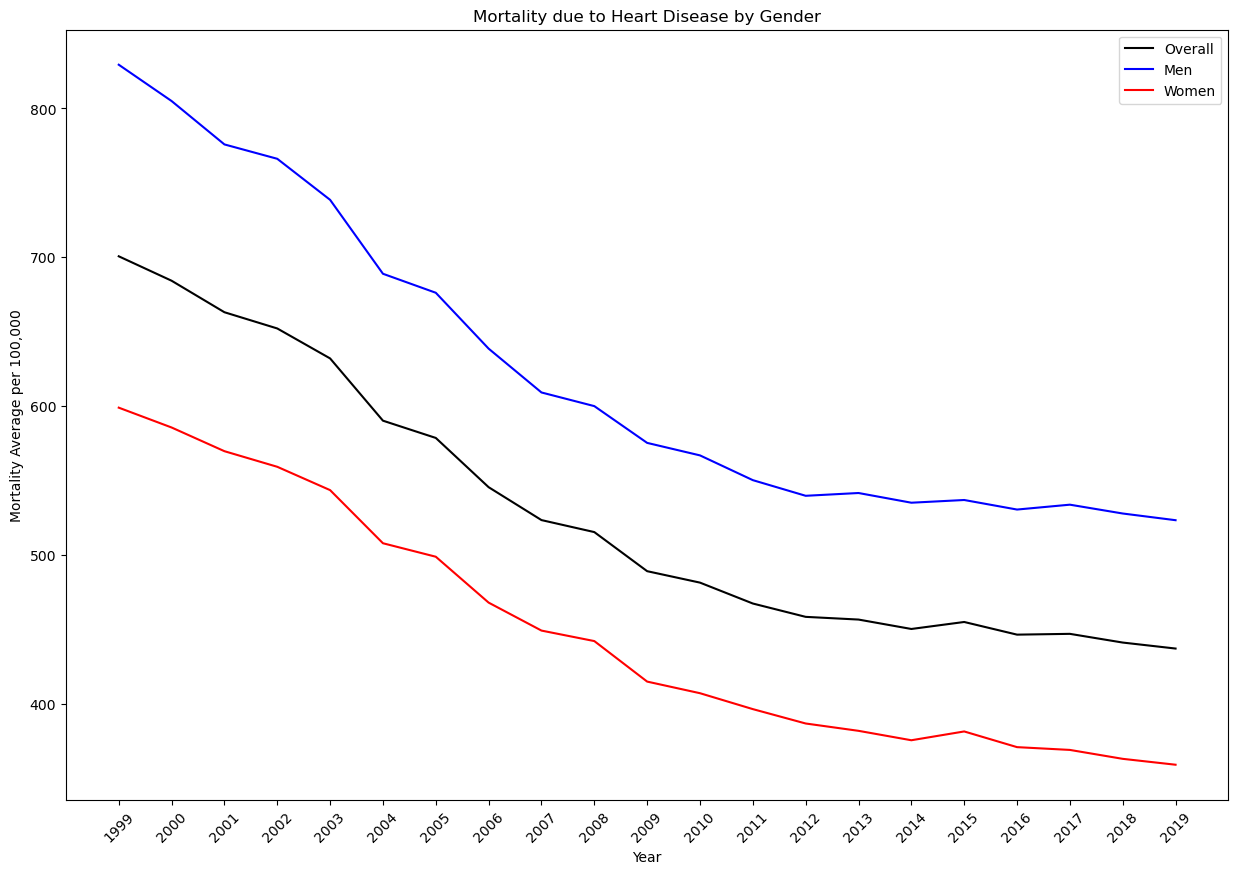

In [68]:
years = heart_by_sex.keys()

plt.figure(figsize=(15,10))
Overall, = plt.plot(years, heart_by_sex.loc["Overall", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="black", label="Overall")

Men, = plt.plot(years, heart_by_sex.loc["Men", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="blue", label="Men")

Women, = plt.plot(years, heart_by_sex.loc["Women", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="red", label="Women")

plt.legend(handles=[Overall, Men, Women], loc="best")
plt.title("Mortality due to Heart Disease by Gender")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()

In [59]:
heart_study_age = heart_study_cleaned.loc[(heart_study_cleaned["Ethnicity"] == "Overall")& 
                                                (heart_study_cleaned["Sex"] == "Overall")]

heart_by_age = heart_study_age.groupby(["Year", "Age Group"]).mean()["Data_Value"]
heart_by_age = heart_by_age.unstack()
heart_by_age = heart_by_age.T
heart_by_age

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Age Group,,,,,,,,,,,,,,,,,,,,,
Ages 35-64 years,87.650973,86.585178,84.235204,83.411525,81.862440,77.665049,76.642024,75.360551,73.066351,72.840123,...,70.764496,70.637944,71.215907,71.691651,73.201758,73.878190,74.504022,74.223587,74.485722,74.023192
Ages 65 years and older,1325.536209,1293.463506,1253.090949,1231.900853,1192.824975,1112.614065,1090.229960,1024.689762,982.380410,966.328598,...,899.849735,871.626429,852.929365,848.778578,834.458862,843.267507,825.439054,826.804233,814.718604,807.057771


In [60]:
heart_study["Age Group"].unique()

array(['Ages 35-64 years', 'Ages 65 years and older'], dtype=object)

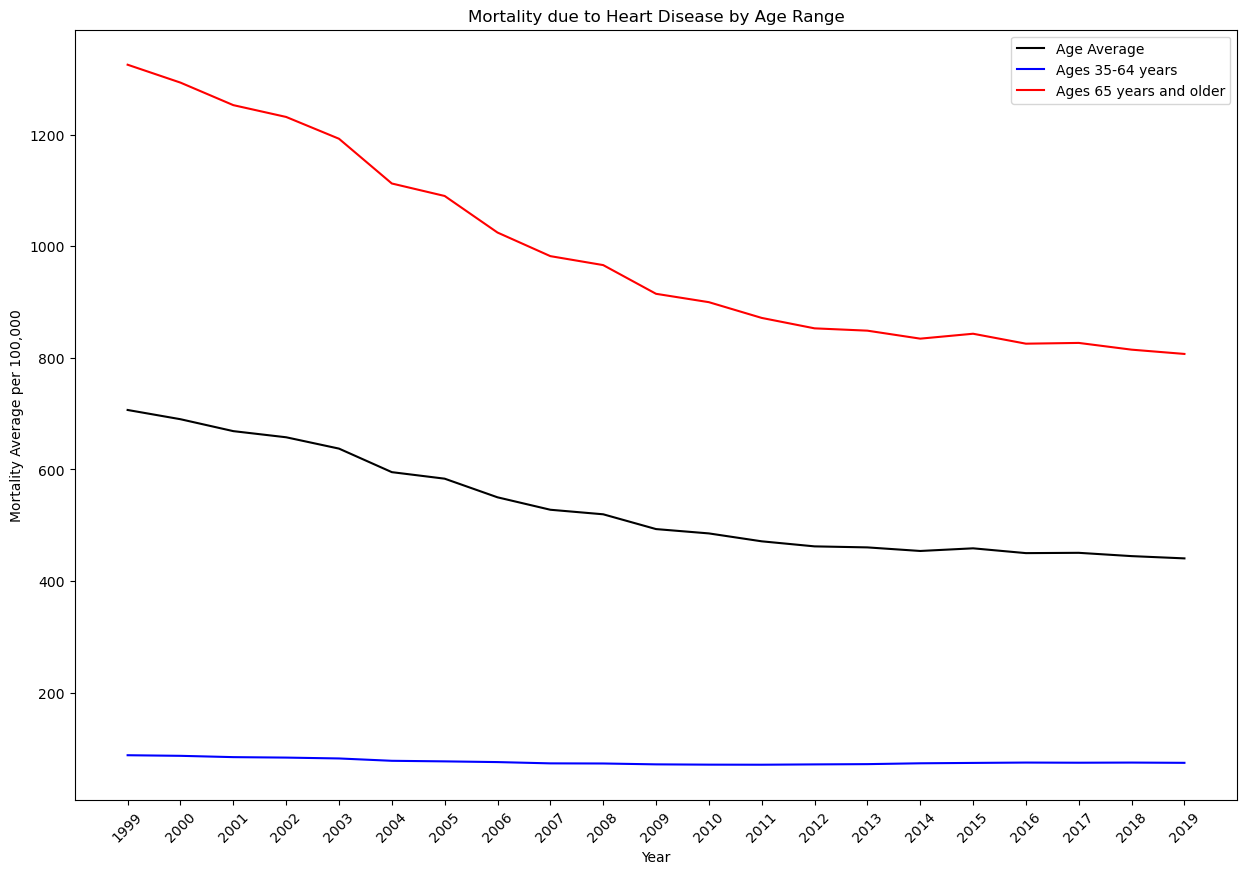

In [69]:
years = heart_by_age.keys()
age_trend = heart_by_age.mean()

plt.figure(figsize=(15,10))
Age, = plt.plot(years, age_trend, color = "black", label = "Age Average")

Age35_64, = plt.plot(years, heart_by_age.loc["Ages 35-64 years", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="blue", label="Ages 35-64 years")

Age65, = plt.plot(years, heart_by_age.loc["Ages 65 years and older", ["1999","2000","2001",
                                                         "2002","2003","2004","2005","2006","2007","2008","2009",
                                                         "2010","2011","2012","2013","2014","2015","2016","2017",
                                                         "2018","2019"]], color="red", label="Ages 65 years and older")

plt.legend(handles=[Age, Age35_64, Age65], loc="best")
plt.title("Mortality due to Heart Disease by Age Range")
plt.xlabel("Year")
plt.ylabel("Mortality Average per 100,000")

plt.xticks(rotation=45)

plt.show()